# U.S. Medical Insurance Costs

We have a dataset of inusrance costs from X Insurance Company. We can analyze this data to draw some conclusions and learn more about how the company is performing, how it operates, and what it's standards are regarding different demographics.

Let's first load the data:

In [1]:
import pandas as pd

data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

We now know the columns. Let's take a look at the difference between <strong>sex, smoker, and regions</strong>. We will look at columns with greater variance later.
Here is a visualization of the demographics mentioned

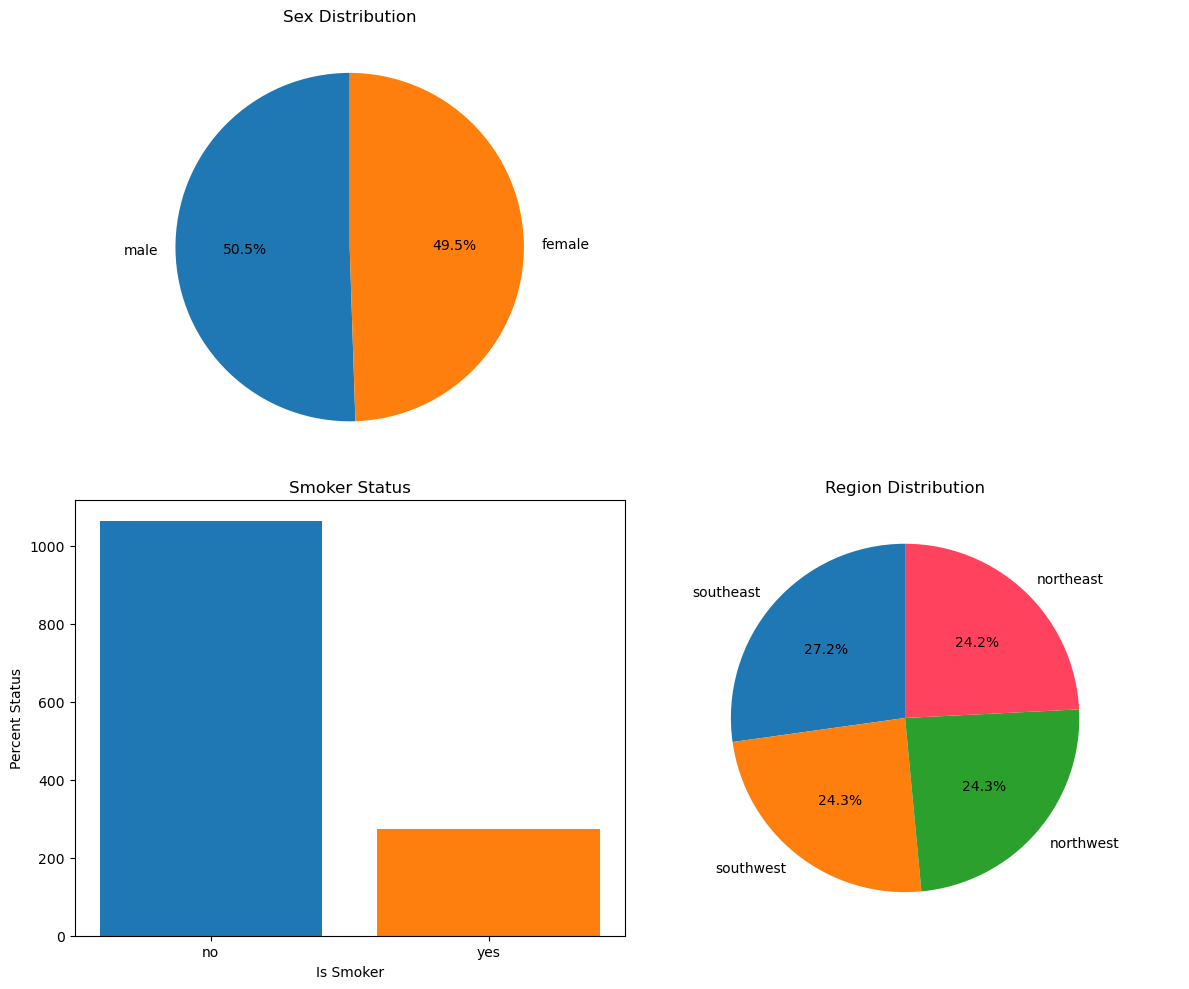

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0,0].pie(data['sex'].value_counts().values, labels=data['sex'].value_counts().index,  autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e'])
axes[0,0].set_title("Sex Distribution")

axes[1,0].bar(data['smoker'].value_counts().index, data['smoker'].value_counts().values, color=['#1f77b4', '#ff7f0e'])
axes[1,0].set_title("Smoker Status")
axes[1,0].set_xlabel("Is Smoker")
axes[1,0].set_ylabel("Percent Status")

axes[1,1].pie(data['region'].value_counts().values, labels=data['region'].value_counts().index,  autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#ff435e'])
axes[1,1].set_title("Region Distribution")

axes[0, 1].axis("off")

plt.tight_layout()
plt.show()
